# DS School 데이터 분석

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import os

### * 믹스패널 데이터
>- 2009년 설립된 믹스패널은 사용자 추적을 기본으로 하는 분석 툴로, 원하는 서비스 사용자를 지정하면 해당 유저의 활동을 모두 조회할 수 있는 기능을 제공해줍니다. 이를 통해 해당 사용자 그룹의 특성과 사용 패턴을 알 수 있습니다. 유명 액셀러레이터 ‘Y Combinator’의 멤버로 트위치, 우버, 핏빗, 스포티파이, 세일즈포스 등의 고객사를 보유하고 있으며 2016년 1월 기준 누적 투자액 800억원을 기록함과 동시에 기업 가치 9,000억원대로 평가 받는 분석툴이기도 합니다. 실시간분석이 가능하며 코호트 분석과 잔존율, 퍼널 분석이 가능합니다. 믹스패널 데이터 또한 고객의 유입경로 등의 정보를 가지고 있습니다.


## 1. 데이터베이스에서 설문조사 결과를 읽어와주세요. 그 다음 사용자와 질문을 기준으로 정렬해주세요.
>- surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬해주세요.

In [2]:
connect = sqlite3.connect(os.getcwd() + '/dsschool/dsschool.db')
connect

In [3]:
query = 'select * from surveys'
survey = pd.read_sql(query, connect)
print(survey.shape)
survey.head()

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [4]:
# 정렬

survey = survey.sort_values(['user_id','question_id','created_at']).reset_index(drop=True)
survey.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
1,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
2,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
3,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
4,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639



## 2. Survey 정보를 cleaning해주세요.

>- answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환해주세요.
>- created_at과 updated_at을 datetime 형식으로 변환해주세요.
>- 같은 user_id가 여러번의 설문조사를 응답한 경우도 제거해주세요.
>- created_at과 updated_at을 datetime 자료형으로 변환해주세요.
>- 같은 유저가 여러번 설문조사를 응답한 경우를 제거해주세요,

In [5]:
# answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환

survey[[x + '(bool)' for x in list(survey)[3:-2]]] = survey[list(survey)[3:-2]]
survey[list(survey)[17:]] = survey[list(survey)[17:]].apply(lambda x: x.replace('f', False))
survey[list(survey)[17:]] = survey[list(survey)[17:]].apply(lambda x: x.replace('t', True))
survey.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,...,answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,...,False,False,False,None,None,None,None,None,None,None
1,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,...,False,False,None,None,None,None,None,None,None,None
2,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,...,False,False,False,False,False,False,False,False,True,False
3,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,...,False,None,None,None,None,None,None,None,None,None
4,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,...,True,False,None,None,None,None,None,None,None,None


In [6]:
# created_at과 updated_at을 datetime 형식으로 변환

survey[['created_at', 'updated_at']] = survey[['created_at', 'updated_at']].apply(lambda x: pd.to_datetime(x))
survey['created_at'].dtype, survey['updated_at'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [7]:
# 같은 user_id가 여러번의 설문조사를 응답한 경우도 제거

survey2 = survey.drop_duplicates(['user_id','question_id'], keep='last')
print(survey2.shape)
survey2.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,...,answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,...,False,False,False,None,None,None,None,None,None,None
1,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,...,False,False,None,None,None,None,None,None,None,None
2,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,...,False,False,False,False,False,False,False,False,True,False
3,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,...,False,None,None,None,None,None,None,None,None,None
4,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,...,True,False,None,None,None,None,None,None,None,None



## 3. 데이터베이스에서 결제정보를 불러와주세요. 그리고 연락처와 수업정보를 정리해주세요.
>- 모든 연락처의 양식을 010-xxxx-xxxx으로 통일해주세요. 단, 010으로 시작하지 않는 전화번호는 잘못 기입된 전화번호라고 가정하고 NaN값 처리해주세요.
>- 010이나 +82로 시작하는 번호를 골라주세요. +의 경우 문자 내에서 특정한 역할을 수행하기 때문에 이를 무력화 시켜주는 역슬래시()를 사용하여야 합니다.

In [8]:
query = 'select * from payments'
payment = pd.read_sql(query, connect)
print(payment.shape)
payment.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


In [9]:
# 연락처 정리

payment.loc[np.logical_not(payment['연락처'].str.contains('^010|^\+82')), '연락처(clean)'] = np.nan
payment.loc[payment['연락처(clean)'].isnull() & payment['연락처'].str.contains('-'), '연락처(clean)'] = payment['연락처']
payment.loc[payment['연락처(clean)'].isnull(), '연락처(clean)'] = payment['연락처'].str[:3] + '-' + payment['연락처'].str[3:7] + '-' + payment['연락처'].str[7:]
payment.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577


In [10]:
# 신청수업 정리

payment['수업타입'] = payment['신청수업'].str.split(' ', expand=True)[0]
payment['기수'] = payment['신청수업'].str.split(' ', expand=True)[1]
payment.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,5기
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,22기
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,22기
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,5기



## 4. 2018년 이후 결제 정보를 정리해주세요.
>- 1) 신청날짜 컬럼을 datetime 자료형으로 만들어주세요.
>- 2) 결제가 완료된 경우 True, 아닌 경우 False인 컬럼을 만들어주세요.

In [11]:
# 신청날짜 -> datetime

payment['신청날짜'] = pd.to_datetime(payment['신청날짜'])
payment['신청날짜'].dtype

dtype('<M8[ns]')

In [12]:
# 결제완료 컬럼 생성

payment['상태'].value_counts(dropna=False)

결제 완료    810
처리 중     127
Name: 상태, dtype: int64

In [13]:
payment.loc[payment['상태'] == '결제 완료', '상태(bool)'] = True
payment.loc[payment['상태'] != '결제 완료', '상태(bool)'] = False
payment.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,5기,True
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,22기,True
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,22기,True
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,5기,True



## 5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가해주세요. 그리고, 금액 정보를 정수형 (int)로 바꿔주세요.

In [14]:
# date, time columns

payment['신청날짜(연)'] = payment['신청날짜'].dt.year
payment['신청날짜(월)'] = payment['신청날짜'].dt.month
payment['신청날짜(일)'] = payment['신청날짜'].dt.day
payment['신청날짜(시)'] = payment['신청날짜'].dt.hour
payment['신청날짜(분)'] = payment['신청날짜'].dt.minute
payment['신청날짜(초)'] = payment['신청날짜'].dt.second
payment['신청날짜(요일)'] = payment['신청날짜'].dt.day_name()


# price --> int

payment['금액(int)'] = payment['금액'].str.replace(',', '').astype(int)

payment.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),...,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,...,22기,True,2018,1,31,15,42,20,Wednesday,495000
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,...,5기,True,2018,1,31,15,29,24,Wednesday,594000
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,...,22기,True,2018,1,31,14,4,14,Wednesday,495000
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,...,22기,True,2018,1,31,10,18,19,Wednesday,495000
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,...,5기,True,2018,1,30,19,12,54,Tuesday,594000



## 6. 결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이를 구해주세요.

In [15]:
# 신청날짜(요일)별 금액

pd.pivot_table(payment, index='신청날짜(요일)', values='금액(int)', aggfunc=['sum','count']).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


In [16]:
# 신청날짜(시)별 금액

pd.pivot_table(payment, index='신청날짜(시)', values='금액(int)', aggfunc=['sum','count'])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


```
- DS School 수강생들의 대부분이 직장인임을 감안할 때, 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있습니다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있습니다.
이를 바탕으로 콘텐츠 제작자에게 근무시간에 딴 짓을 하는 직장인들을 타겟팅하는 콘텐츠를 제작해달라고 요청할 수 있습니다. 또한, 페이스북이 제공하는 광고 시간 타겟팅 기능을 이용하여 근무시간대에 들어가는 광고예산의 비중을 늘릴 수도 있습니다.
```


## 7. 사용자의 니즈를 바탕으로 향후 오픈할 강의의 우선순위를 정하려고 합니다. 설문조사 데이터에서 답변을 정리해서 보여주세요.
>-  1번, 3번 질문에 대한 응답을 정리해서 보여주세요

In [17]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

def to_dummy(data):
    return 1 if data == True else 0

table = survey2
table[list(table)[17:]] = table[list(table)[17:]].applymap(lambda x: to_dummy(x))

table = pd.pivot_table(table[table['question_id'].isin([1,3])], 
                       index='question_id', 
                       values=answer_list,
                       aggfunc='mean')
table = table[answer_list]
table

/home/hyunji/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368



## 8. 결제 데이터와 유저 데이터에는 동일한 id (payment_id), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 pandas merge로 해주세요.

In [18]:
# users 데이터 업로드

query = 'select * from users'
user = pd.read_sql(query, connect)
user.head()

,user_id,mixpanel_id,payment_id,email
0,2q0ucs4kiiko,DLDEBFOWFZMCIWXRWZZLGULCHTPPYZTDPSTFMZCQUPNNZS...,None,c4l74sjvhybg@dsschool.co.kr
1,n5yxumr8w20w,TCCZWHROYZCUABWOHIXIYDSLKYPQHLUGVYYLTDAQETOEEF...,None,wgkwoep07x26@dsschool.co.kr
2,tjzjbj2awswz,BBRFELKWMCNGYXSFZKPCUXXAAVJZHMDHRZKZKXSDIRDIFS...,None,64elpdsxe0wz@dsschool.co.kr
3,xvt93f37om9q,TKBAYLPGJKWLUGKZQVBJEKKMIZULJIAVUUFBXMZIEPGXGB...,None,hgvkoilokgfq@dsschool.co.kr
4,smsnz99ugq3q,PAAVHVFEYHJZUWNYRDVEXWXXLLVVAWNJDIRSQTQYGXQLAK...,None,5ztx2nzuitjg@dsschool.co.kr


In [19]:
# survey2 : user (key; user_id)

survey2 = pd.merge(survey2, user, on=['user_id'], how='inner')
survey2.head(3)

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,...,answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),mixpanel_id,payment_id,email
0,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,...,0,0,0,0,0,0,0,LDHHINPKRHHAJVSJADLMNXOADDDLHVTWZOXCNHIGVOKYVD...,None,qzq07yln37o1@dsschool.co.kr
1,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,...,0,0,0,0,0,0,0,LDHHINPKRHHAJVSJADLMNXOADDDLHVTWZOXCNHIGVOKYVD...,None,qzq07yln37o1@dsschool.co.kr
2,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,...,0,0,0,0,0,1,0,LDHHINPKRHHAJVSJADLMNXOADDDLHVTWZOXCNHIGVOKYVD...,None,qzq07yln37o1@dsschool.co.kr


In [20]:
# payment : survey2 (key; email)

payment2 = pd.merge(payment, survey2, left_on=['이메일'], right_on=['email'], how='inner')
payment2.head(3)

,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),...,answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),mixpanel_id,payment_id_y,email
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,...,0,0,0,0,0,0,0,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,None,0usbs4knns0s@dsschool.co.kr
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,...,0,0,0,0,0,0,0,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,None,0usbs4knns0s@dsschool.co.kr
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,...,0,0,0,0,0,0,1,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,None,0usbs4knns0s@dsschool.co.kr



## 9. 결제 데이터와 유저 데이터에는 동일한 id (e-mail), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 SQL join으로 합쳐주세요.

In [21]:
query = '''select * from users a
            inner join surveys b
                on a.user_id = b.user_id
            inner join payments c
                on a.email = c.이메일            
        '''
data = pd.read_sql(query, connect)
data.head(3)

,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,...,updated_at,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,...,2018-01-03 05:42:02.303657,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료
1,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,...,2018-01-06 08:47:19.325152,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료
2,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,...,2018-01-06 08:47:19.325152,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료



## 10. 8번에서 merging한 데이터 중 필요한 컬럼만 추려주세요. 그리고 데이터를 클리닝해주세요.

In [22]:
# 분석에 필요한 컬럼들의 리스트
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

In [23]:
payment2 = payment2[selected_columns]
payment2.head(3)

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,...,answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,5pi3y5b5vyyz,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,...,0,0,0,0,0,0,0,0,2018-03-05 00:33:07.967646,2018-03-05 00:33:07.967646
1,5pi3y5b5vyyz,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,...,0,0,0,0,0,0,0,0,2018-03-05 00:33:14.654900,2018-03-05 00:33:14.654900
2,5pi3y5b5vyyz,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,QRLCZJOGNMMUBATPWCBTTBPCHKMFZCZQTFMTIIMDUGALCR...,...,0,0,0,0,0,0,0,1,2018-03-05 00:33:17.996599,2018-03-05 00:33:17.996599


In [24]:
# 결제를 한 이후에도 설문조사를 한 경우는 삭제하고 

payment2 = payment2[payment2['신청날짜'] >= payment2['created_at']]


# 여러번 설문조사를 한 경우는 첫번째 설문 조사만 남기고 중복정보도 제거해주어야 합니다.
# 이메일과 신청수업, question_id 3개가 중복되는 경우는 drop_duplicates()를 이용해 최신의 정보만 남겨주세요.
# (단 중복제거하기 전에 "이메일", "question_id", "created_at" 컬럼을 기준으로 sorting 해야 합니다.)

payment2 = payment2.sort_values(['이메일','question_id','created_at'])
payment2 = payment2.drop_duplicates(['이메일','신청수업','question_id'], keep='last')


## 11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리해주세요.

In [25]:
table2 = payment2
table2[answer_list] = table2[answer_list].applymap(lambda x: to_dummy(x))

table2 = pd.pivot_table(table2[table2['question_id'].isin([1,3])], 
                        index='question_id', 
                        values=answer_list,
                        aggfunc='mean')
table2 = table2[answer_list]
table2

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


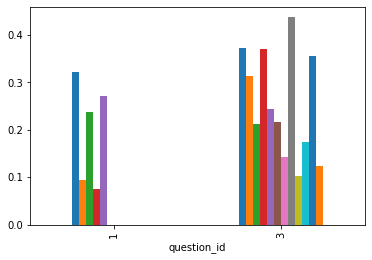

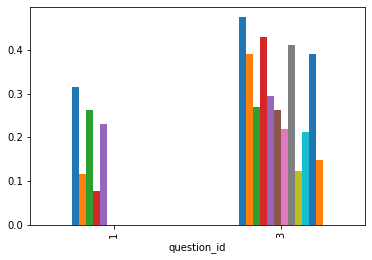

In [33]:
# 결제완료/other 설문조사 결과 비교

table.plot(kind='bar', legend=False)
table2.plot(kind='bar', legend=False)

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보입니다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있습니다.

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않습니다. 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기 입니다.

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있습니다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 입니다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있습니다.

현재 설문조사 결과를 종합해봤을 떄, 직장에서 업무에 데이터 사이언스를 활용하면서 '추천 시스템'을 만들거나 텍스트 데이터를 다루는 것에 대한 수요가 매우 높음을 확인할 수 있습니다.

엑셀에도 텍스트를 다룰 수 있는 기능들이 많이 있지만, 파이썬은 다양한 오픈소스와 함께 자유도가 높아 잘만 배워둔다면 엑셀에 비해 텍스트를 훨씬 쉽게 다룰 수 있습니다.

또한, 카카오 같은 플랫폼 사업자나 여러 이커머스 기업들은 추천시스템 연구를 꾸준히 진행하고 있고 그 수요도 몹시 높은 편입니다. 이를 통해 향후 제작할 컨텐츠에서 텍스트나 추천시스템의 비중을 늘려볼까 합니다.


## 12. created_at은 세션이 생성된 시간이고 '신청날짜'는 실제로 수업을 신청한 시간입니다. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산해주세요. 단, 신청날짜가 created_at보다 작은(먼저인) 경우가 있는데 이를 제외하고 구해주세요.

In [29]:
# 결제까지 걸린 시간 

series = pd.DataFrame(payment2['신청날짜'] - payment2['created_at'])
series.columns = ['time']
series.head()

,time
887,09:14:16.752474
888,09:14:12.718888
889,09:13:59.302001
890,09:13:55.157445
891,09:13:51.359780


In [81]:
# time to day

series['time_day'] = series['time'].dt.total_seconds() / (24*3600)
series.head()

,time,time_day
887,09:14:16.752474,0.384916
888,09:14:12.718888,0.384869
889,09:13:59.302001,0.384714
890,09:13:55.157445,0.384666
891,09:13:51.359780,0.384622


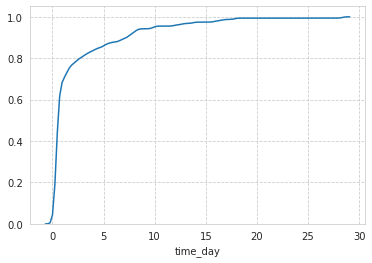

In [83]:
# 가설)  a%의 고객은 세션 생성후 b일 안에 결제한다

import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '--'}) # theme

sns.distplot(series['time_day'], hist=False, kde_kws={'cumulative' : True})

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 많은 고민을 한다는 것을 파악할 수 있습니다. 이를 통해 DS School에 관심을 가졌지만 아직 결제를 하지 않은 잠재고객들의 결제 가능성을 역으로 추정해 리타겟팅 전략의 예산 분배를 진행할 수 있습니다.


## 14. 믹스패널 데이터를 불러와 주세요. 그리고 이를 users와 payments 테이블과 병합해주세요. 그리고  캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾아주세요.
>- 마케팅 캠페인별 효율 비교분석
>- 사후분석 위해 utm 추가


In [86]:
mixpanel = pd.read_csv(os.getcwd() + '/dsschool/mixpanel_people_profiles_revised.csv')
mixpanel.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [122]:
# mixpanel, user, payment merge

mixpanel2 = pd.merge(mixpanel, user, left_on=['distinct_id'], right_on=['mixpanel_id'], how='inner')
mixpanel2 = pd.merge(mixpanel2, payment, on=['payment_id'], how='left')
mixpanel2.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],...,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
# 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾아주세요.

utm_first = mixpanel2[mixpanel2['utm_campaign [first touch]'].notnull()][['utm_campaign [first touch]','상태(bool)']]
utm_first['상태(bool)'] = utm_first['상태(bool)'].apply(to_dummy)
table3 = pd.pivot_table(utm_first, index='utm_campaign [first touch]', values='상태(bool)', aggfunc='mean')
table3 = table3[table3['상태(bool)'] != 0]
table3.sort_values(['상태(bool)'], ascending=False)

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
kang1,0.066667
dripinsta7,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


head와 tail을 보면 극단적으로 많거나 (33%) 0%인 것을 확인할 수 있습니다. 이는 적은 예산을 쓴 캠페인은 해당 캠페인으로 부터 유입된 고객 자체가 적기 때문에 결과가 극단적으로 나오는 것입니다.

따라서, 유입 고객의 수가 20명 이상인 캠페인에 대해서만 위의 분석을 진행하기로 합니다. campaign으로부터 유입된 고객이 20명 이상인 캠페인만을 이용해 위의 피벗 테이블을 다시 만들어주세요.

In [196]:
utm_first2 = utm_first[utm_first.groupby('utm_campaign [first touch]')['utm_campaign [first touch]'].transform('count') >= 20]
table4 = pd.pivot_table(utm_first2, index='utm_campaign [first touch]', values='상태(bool)', aggfunc='mean')
table4 = table4[table4['상태(bool)'] != 0]
table4.sort_values(['상태(bool)'], ascending=False)

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390


상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있습니다. 결제가 마케팅의 최종 목표이기 때문에, 마케팅팀에 해당 캠페인의 리스트를 전달해주어 해당 캠페인의 컨텐츠 내용을 분석한 뒤 가설을 세워 더 효율이 좋은 캠페인을 만들 수 있습니다.


## 15. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾아주세요.

In [207]:
vip = payment[['이메일','상태(bool)']]

vip = vip[vip['상태(bool)'] == True]
pd.pivot_table(vip, index='이메일', values='상태(bool)', aggfunc='count').sort_values(['상태(bool)'], ascending=False).head(10)

,상태(bool)
이메일,
1n04ko1pgq3r@dsschool.co.kr,4
e57r0bnxz4du@dsschool.co.kr,3
u6rxonoxuow4@dsschool.co.kr,3
9y78t05klfhw@dsschool.co.kr,3
va7d8fgmxsxf@dsschool.co.kr,3
9u2mz3w23uhk@dsschool.co.kr,3
w9df010ys6yd@dsschool.co.kr,3
uzzsngp7nk7z@dsschool.co.kr,3
uhvsbw6cjg19@dsschool.co.kr,3
